In [1]:
#Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
#load in datasets
matches = pd.read_csv("epl_matches.csv", index_col=0) 
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,7.0,1.0,18.9,1.0,0,0,2019,Huddersfield Town
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,Match Report,NaN,13.0,3.0,18.1,1.0,0,0,2019,Huddersfield Town
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,Match Report,NaN,5.0,1.0,21.6,0.0,0,0,2019,Huddersfield Town
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,Match Report,NaN,7.0,3.0,19.0,1.0,0,0,2019,Huddersfield Town


In [3]:
# Get the shape
matches.shape

(4366, 27)

In [4]:
# How many Matches each team has played. Keep in mind of relegation and promotion rules.
matches["team"].value_counts()

team
West Ham United             219
Arsenal                     218
Crystal Palace              218
Manchester City             218
Everton                     218
Tottenham Hotspur           218
Manchester United           218
Brighton and Hove Albion    218
Wolverhampton Wanderers     218
Newcastle United            218
Liverpool                   218
Chelsea                     217
Leicester City              190
Southampton                 190
Aston Villa                 181
Burnley                     181
Fulham                      143
Bournemouth                 142
Watford                     114
Leeds United                114
Brentford                   105
Sheffield United            104
Norwich City                 76
Nottingham Forest            67
West Bromwich Albion         38
Cardiff City                 38
Huddersfield Town            38
Luton Town                   29
Name: count, dtype: int64

In [5]:
# Datatype of each value
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [6]:
#convert date to date-time
matches["date"] = pd.to_datetime(matches["date"])
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [7]:
# setting the venue code

matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches
# 0 = away 
# 1 = home

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal,1
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal,0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal,1
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal,1
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,NaN,7.0,1.0,18.9,1.0,0,0,2019,Huddersfield Town,0
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,NaN,13.0,3.0,18.1,1.0,0,0,2019,Huddersfield Town,1
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,NaN,5.0,1.0,21.6,0.0,0,0,2019,Huddersfield Town,0
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,NaN,7.0,3.0,19.0,1.0,0,0,2019,Huddersfield Town,1


In [8]:
# Create numeric codes for each unique 'opponent' value and store them in a new column 'opp_code'.
matches["opp_code"] = matches["opponent"].astype("category").cat.codes


In [9]:
# Extract the hour component from the 'time' column and store it as integers in a new column named 'hour'.
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,7.0,19.1,0.0,0,0,2024,Arsenal,1,20,12
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,2.0,16.4,0.0,1,1,2024,Arsenal,0,8,20
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,9.0,13.8,0.0,1,1,2024,Arsenal,1,10,15
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,5.0,15.0,0.0,0,0,2024,Arsenal,1,17,16
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,4.0,17.4,0.0,0,0,2024,Arsenal,0,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,1.0,18.9,1.0,0,0,2019,Huddersfield Town,0,23,12
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,3.0,18.1,1.0,0,0,2019,Huddersfield Town,1,24,15
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,1.0,21.6,0.0,0,0,2019,Huddersfield Town,0,14,20
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,3.0,19.0,1.0,0,0,2019,Huddersfield Town,1,17,14


In [10]:
# Add a new column 'day_code' to the 'matches' DataFrame, containing the day of the week from the 'date' column.
matches["day_code"] = matches["date"].dt.dayofweek
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,19.1,0.0,0,0,2024,Arsenal,1,20,12,5
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,16.4,0.0,1,1,2024,Arsenal,0,8,20,0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,13.8,0.0,1,1,2024,Arsenal,1,10,15,5
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,15.0,0.0,0,0,2024,Arsenal,1,17,16,6
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,17.4,0.0,0,0,2024,Arsenal,0,9,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,18.9,1.0,0,0,2019,Huddersfield Town,0,23,12,5
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,18.1,1.0,0,0,2019,Huddersfield Town,1,24,15,5
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,21.6,0.0,0,0,2019,Huddersfield Town,0,14,20,4
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,19.0,1.0,0,0,2019,Huddersfield Town,1,17,14,6


In [11]:
#target will be if team won lost or drawn
conditions = [
    (matches["result"] == "W"),  # Win condition
    (matches["result"] == "L"),  # Lose condition
    (matches["result"] == "D")   # Draw condition
]

values = [1, -1, 0]  # 1 for win, -1 for lose, 0 for draw
matches["target"] = np.select(conditions, values, default=np.nan)
# # Apply np.select to create the 'target' column based on the defined conditions and values
matches


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,0.0,0,0,2024,Arsenal,1,20,12,5,1.0
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,0.0,1,1,2024,Arsenal,0,8,20,0,1.0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,0.0,1,1,2024,Arsenal,1,10,15,5,0.0
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,0.0,0,0,2024,Arsenal,1,17,16,6,1.0
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,0.0,0,0,2024,Arsenal,0,9,16,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,1.0,0,0,2019,Huddersfield Town,0,23,12,5,-1.0
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,1.0,0,0,2019,Huddersfield Town,1,24,15,5,-1.0
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,0.0,0,0,2019,Huddersfield Town,0,14,20,4,-1.0
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,1.0,0,0,2019,Huddersfield Town,1,17,14,6,0.0


In [12]:
#Team Rolling Stats
# Sort the DataFrame by team and date
matches = matches.sort_values(['team', 'date'])

# Calculate the sum of the results of the last 5 matches for each team
matches['last_5_results'] = matches.groupby('team')['target'].rolling(5).sum().reset_index(0, drop=True)

# calculate the sum of gf in the last 5 matches for each team on a rolling basis
matches['last_5_gf'] = matches.groupby('team')['gf'].rolling(5).sum().reset_index(0, drop=True)

# calculate the sum of ga in the last 5 matches for each team on a rolling basis
matches['last_5_ga'] = matches.groupby('team')['ga'].rolling(5).sum().reset_index(0, drop=True)

# calculate the average of poss in the last 5 matches for each team on a rolling basis
matches['last_5_avg_poss'] = matches.groupby('team')['poss'].rolling(5).mean().reset_index(0, drop=True)

# calculate the average of 'sot' in the last 5 matches for each team on a rolling basis
matches['last_5_avg_sot'] = matches.groupby('team')['sot'].rolling(5).mean().reset_index(0, drop=True)


In [13]:
#opponent Stats

# Sort the DataFrame by opponent and date
matches = matches.sort_values(['opponent', 'date'])

# Calculate the sum of the results of the last 5 matches for each opponent
matches['opp_last_5_results'] = matches.groupby('opponent')['target'].rolling(5).sum().reset_index(0, drop=True)

# calculate the sum of gf in the last 5 matches for each opponent on a rolling basis
matches['opp_last_5_gf'] = matches.groupby('opponent')['gf'].rolling(5).sum().reset_index(0, drop=True)

# calculate the sum of ga in the last 5 matches for each opponent on a rolling basis
matches['opp_last_5_ga'] = matches.groupby('opponent')['ga'].rolling(5).sum().reset_index(0, drop=True)

# calculate the average of poss in the last 5 matches for each opponent on a rolling basis
matches['opp_last_5_avg_poss'] = matches.groupby('opponent')['poss'].rolling(5).mean().reset_index(0, drop=True)

# calculate the average of 'sot' in the last 5 matches for each opponent on a rolling basis
matches['opp_last_5_avg_sot'] = matches.groupby('opponent')['sot'].rolling(5).mean().reset_index(0, drop=True)


In [14]:
#comparison Stats

# Sort the DataFrame by team and date
matches = matches.sort_values(['team', 'date'])

# add a column 'last_5_gd' to the 'matches' DataFrame, containing the goal difference of the last 5 matches for each team on a rolling basis.
matches['last_5_gd'] = matches['last_5_gf'] - matches['last_5_ga']

# add a column 'opp_last_5_gd' to the 'matches' DataFrame, containing the goal difference of the last 5 matches for each opponent on a rolling basis.
matches['opp_last_5_gd'] = matches['opp_last_5_gf'] - matches['opp_last_5_ga']

# add a column that calculates the goal difference between the team and the opponent in the last 5 matches.
matches['last_5_gd_diff'] = matches['last_5_gd'] - matches['opp_last_5_gd']

# add a column that calculates the average possession difference between the team and the opponent in the last 5 matches.
matches['last_5_avg_poss_diff'] = matches['last_5_avg_poss'] - matches['opp_last_5_avg_poss']

# add a column that calculates the average shots on target difference between the team and the opponent in the last 5 matches.
matches['last_5_avg_sot_diff'] = matches['last_5_avg_sot'] - matches['opp_last_5_avg_sot']

matches.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_5_results,opp_last_5_gf,opp_last_5_ga,opp_last_5_avg_poss,opp_last_5_avg_sot,last_5_gd,opp_last_5_gd,last_5_gd_diff,last_5_avg_poss_diff,last_5_avg_sot_diff
28,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,L,0.0,2.0,Brentford,...,1.0,11.0,9.0,61.6,6.8,2.0,2.0,0.0,-13.4,-1.8
29,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Away,W,2.0,1.0,Tottenham,...,-1.0,9.0,10.0,38.0,4.0,0.0,-1.0,1.0,5.4,1.2
30,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Home,W,1.0,0.0,Sheffield Utd,...,3.0,15.0,5.0,66.4,5.6,1.0,10.0,-9.0,-16.0,-0.6
32,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Away,L,0.0,3.0,Newcastle Utd,...,-1.0,12.0,13.0,46.6,5.2,-1.0,-1.0,0.0,4.4,-0.6
33,2024-03-09,15:00,Premier League,Matchweek 28,Sat,Home,W,2.0,1.0,Fulham,...,-1.0,6.0,10.0,54.8,4.6,-2.0,-4.0,2.0,-1.4,-0.6


In [15]:
# fill the NaN values in the dataframe columns with the mean value of those columns

matches['last_5_results'].fillna(matches['last_5_results'].mean(), inplace=True)
matches['opp_last_5_results'].fillna(matches['opp_last_5_results'].mean(), inplace=True)
matches['last_5_gf'].fillna(matches['last_5_gf'].mean(), inplace=True)
matches['opp_last_5_ga'].fillna(matches['opp_last_5_ga'].mean(), inplace=True)
matches['last_5_gd'].fillna(matches['last_5_gd'].mean(), inplace=True)
matches['opp_last_5_gd'].fillna(matches['opp_last_5_gd'].mean(), inplace=True)
matches['last_5_gd_diff'].fillna(matches['last_5_gd_diff'].mean(), inplace=True)
matches['last_5_ga'].fillna(matches['last_5_ga'].mean(), inplace=True)
matches['opp_last_5_gf'].fillna(matches['opp_last_5_gf'].mean(), inplace=True)
matches['opp_last_5_avg_poss'].fillna(matches['opp_last_5_avg_poss'].mean(), inplace=True)
matches['last_5_avg_poss'].fillna(matches['last_5_avg_poss'].mean(), inplace=True)
matches['last_5_avg_poss_diff'].fillna(matches['last_5_avg_poss_diff'].mean(), inplace=True)
matches['opp_last_5_avg_sot'].fillna(matches['opp_last_5_avg_sot'].mean(), inplace=True)
matches['last_5_avg_sot'].fillna(matches['last_5_avg_sot'].mean(), inplace=True)
matches['last_5_avg_sot_diff'].fillna(matches['last_5_avg_sot_diff'].mean(), inplace=True)

matches.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_5_results,opp_last_5_gf,opp_last_5_ga,opp_last_5_avg_poss,opp_last_5_avg_sot,last_5_gd,opp_last_5_gd,last_5_gd_diff,last_5_avg_poss_diff,last_5_avg_sot_diff
28,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,L,0.0,2.0,Brentford,...,1.0,11.0,9.0,61.6,6.8,2.0,2.0,0.0,-13.4,-1.8
29,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Away,W,2.0,1.0,Tottenham,...,-1.0,9.0,10.0,38.0,4.0,0.0,-1.0,1.0,5.4,1.2
30,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Home,W,1.0,0.0,Sheffield Utd,...,3.0,15.0,5.0,66.4,5.6,1.0,10.0,-9.0,-16.0,-0.6
32,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Away,L,0.0,3.0,Newcastle Utd,...,-1.0,12.0,13.0,46.6,5.2,-1.0,-1.0,0.0,4.4,-0.6
33,2024-03-09,15:00,Premier League,Matchweek 28,Sat,Home,W,2.0,1.0,Fulham,...,-1.0,6.0,10.0,54.8,4.6,-2.0,-4.0,2.0,-1.4,-0.6


In [16]:
# rearrange the columns in the matches dataframe to have the target column as the last column
matches_cols = matches.columns.tolist()
matches_cols


['date',
 'time',
 'comp',
 'round',
 'day',
 'venue',
 'result',
 'gf',
 'ga',
 'opponent',
 'xg',
 'xga',
 'poss',
 'attendance',
 'captain',
 'formation',
 'referee',
 'match report',
 'notes',
 'sh',
 'sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'season',
 'team',
 'venue_code',
 'opp_code',
 'hour',
 'day_code',
 'target',
 'last_5_results',
 'last_5_gf',
 'last_5_ga',
 'last_5_avg_poss',
 'last_5_avg_sot',
 'opp_last_5_results',
 'opp_last_5_gf',
 'opp_last_5_ga',
 'opp_last_5_avg_poss',
 'opp_last_5_avg_sot',
 'last_5_gd',
 'opp_last_5_gd',
 'last_5_gd_diff',
 'last_5_avg_poss_diff',
 'last_5_avg_sot_diff']

In [17]:
matches.tail(10)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_5_results,opp_last_5_gf,opp_last_5_ga,opp_last_5_avg_poss,opp_last_5_avg_sot,last_5_gd,opp_last_5_gd,last_5_gd_diff,last_5_avg_poss_diff,last_5_avg_sot_diff
20,2023-12-27,19:30,Premier League,Matchweek 19,Wed,Away,W,4.0,1.0,Brentford,...,3.0,10.0,6.0,48.0,4.4,2.0,4.0,-2.0,1.2,0.0
21,2023-12-30,15:00,Premier League,Matchweek 20,Sat,Home,W,3.0,0.0,Everton,...,1.0,8.0,6.0,63.6,5.2,4.0,2.0,2.0,-14.0,-0.4
24,2024-01-22,19:45,Premier League,Matchweek 21,Mon,Away,D,0.0,0.0,Brighton,...,0.0,5.0,5.0,39.8,3.8,4.0,0.0,4.0,1.8,0.8
26,2024-02-01,20:15,Premier League,Matchweek 22,Thu,Home,L,3.0,4.0,Manchester Utd,...,0.0,11.0,10.0,49.8,4.0,6.0,1.0,5.0,-8.6,1.0
27,2024-02-04,14:00,Premier League,Matchweek 23,Sun,Away,W,4.0,2.0,Chelsea,...,-1.0,11.0,9.0,44.0,6.8,7.0,2.0,5.0,-2.0,-1.8
28,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,L,0.0,2.0,Brentford,...,1.0,11.0,9.0,61.6,6.8,2.0,2.0,0.0,-13.4,-1.8
29,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Away,W,2.0,1.0,Tottenham,...,-1.0,9.0,10.0,38.0,4.0,0.0,-1.0,1.0,5.4,1.2
30,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Home,W,1.0,0.0,Sheffield Utd,...,3.0,15.0,5.0,66.4,5.6,1.0,10.0,-9.0,-16.0,-0.6
32,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Away,L,0.0,3.0,Newcastle Utd,...,-1.0,12.0,13.0,46.6,5.2,-1.0,-1.0,0.0,4.4,-0.6
33,2024-03-09,15:00,Premier League,Matchweek 28,Sat,Home,W,2.0,1.0,Fulham,...,-1.0,6.0,10.0,54.8,4.6,-2.0,-4.0,2.0,-1.4,-0.6


In [19]:
# extremly random forest classifier
# Define the list of predictors including venue code, opponent code, hour, and day code.
predictors = ["venue_code", "opp_code", "hour", "day_code",
'last_5_results',
'last_5_gf',
'last_5_ga',
'last_5_avg_poss',
'last_5_avg_sot',
'opp_last_5_results',
'opp_last_5_gf',
'opp_last_5_ga',
'opp_last_5_avg_poss',
'opp_last_5_avg_sot',
'last_5_gd',
'opp_last_5_gd',
'last_5_gd_diff',
'last_5_avg_poss_diff',
'last_5_avg_sot_diff']


# Define the features (predictors) and the target variable
X = matches[predictors]
y = matches["target"]

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and Train the Extra Trees Model:
from sklearn.ensemble import ExtraTreesClassifier
# Import the ExtraTreesClassifier class from the ensemble module of the sklearn library
et_model = ExtraTreesClassifier(n_estimators=50, min_samples_split=10,random_state=1)
# fit the model to the training data
et_model = et_model.fit(X_train, y_train)


In [20]:
# Generate predictions using the trained Random Forest classifier on the test data using specified predictors.
preds = et_model.predict(X_test)

In [21]:
# measurements of model accuracy
acc = accuracy_score(y_test, preds)
acc

0.6258581235697941

In [22]:
# Create a contingency table showing the counts of actual versus predicted labels
combined = pd.DataFrame({"actual": y_test, "prediction": preds})
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,-1.0,0.0,1.0
actual,,,
-1.0,260,10,49
0.0,104,27,85
1.0,60,19,260


In [23]:
# determine which feature explains the most variance in the model
importances = et_model.feature_importances_
# return the original feature names
feature_names = X.columns
#create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importance

,feature,importance
0,venue_code,0.025503
1,opp_code,0.030510
2,hour,0.025870
3,day_code,0.026440
4,last_5_results,0.152985
5,last_5_gf,0.051100
6,last_5_ga,0.057650
7,last_5_avg_poss,0.028204
8,last_5_avg_sot,0.035737
9,opp_last_5_results,0.130646


<Axes: xlabel='importance', ylabel='feature'>

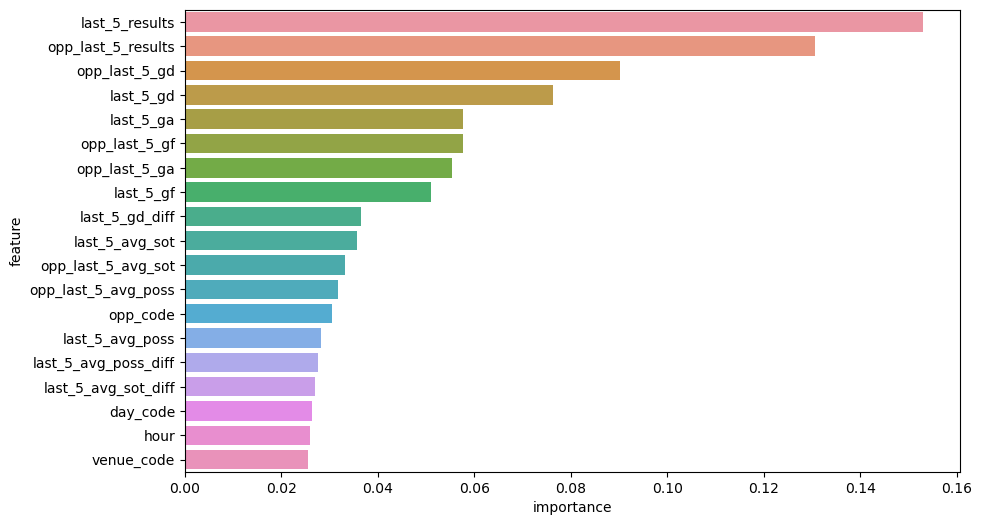

In [24]:
#create a bar plot to visualize the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False))

In [ ]:
# Generate classification report
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

        -1.0       0.56      0.73      0.63       319
         0.0       0.33      0.04      0.07       216
         1.0       0.57      0.73      0.64       339

    accuracy                           0.56       874
   macro avg       0.49      0.50      0.45       874
weighted avg       0.51      0.56      0.50       874

